<a href="https://www.obilorjim.com" target="_blank"><img src = "https://www.obilorjim.com/wp-content/uploads/2021/03/myprofile2.jpg" width = 315, align = "right"> </a>
<h3 style="color:#2462C0; font-style:normal; font-size:1.6em; text-align:center"> 4 Classification Methods with <br><br> Scikit-learn </h3>
<p style="color:#d00000; text-align:center;">KNN&nbsp;&#124;&nbsp;Decision Trees&nbsp;&#124;&nbsp;SVM&nbsp;&#124;&nbsp;Logistic Regression</p>      

<h3 style="color:#2462C0;">Contents</h3>
<ol>
 <li> <a href="#intro">Introduction</a> </li>
 <li> <a href="#dp">Data Processing</a> </li>
 <li> <a href="#classfn">Applying 4 Classification methods</a>
  <ul>
   <li type="a"> <a href="#kkk">K Nearest Neighbor (KNN)</a> </li>
   <li type="a"> <a href="#trees">Decision Trees</a> </li>
   <li type="a"> <a href="#svm">Support vector Machine</a> </li>
   <li type="a"> <a href="#lr">Logistic Regression</a> </li>
  </ul>
 </li>
 <li> <a href="#evaluation">Model Evaluation</a> </li>
 <li> <a href="#conclusion">Result and Conclusion</a>
  <ul>
</ol>

<span style="color:green;font-weight:400;font-size:15px">
    You can download the updated <b>notebook</b> from my <i><a href="https://github.com/jimmundy" target="_blank"> Github page</a></i>
</span>

### <a id="intro"></a> 1. INTRODUCTION

##### **OBJECTIVE**: Explore Scikit-learn with 4 machine learning CLASSIFICATION methods by employing two different evaluation metrics **`Jaccard score`** and **` F1 score`**.

#### What is Scikit Learn?
Scikit-learn is an open-source machine learning library for the Python programming language. It implements a good number of algorithms for tasks such as classification, clustering and regression. Sci-kit learn also provides so many utilities for carrying out machine learning tasks. With Scikit Learn, we can carry out data processing, parameter selection, model evaluation, and more.

The objective here is to introduce how to implement Scikit-learn for machine learning using a specific dataset. Most of the models and algorithms in the Scikit-Learn library are treated in approximately the same approach: basically, we
1. Call a **`fit`** to train the intended model
2. Check the accuracy of the model with a call, **`score`**
3. Forecast the model's outcome (or predict the model) by using **`predict`**.

*Let's go*:

####  Dataset
The dataset (in CSV format) is about past loans and includes details of 400 customers whose loans are either `paid off` or `defaulted`. In machine learning and statistics, **`classification`** is a supervised learning approach in which the computer program learns from some input data and then uses this learning to classify new observations.

We load the dataset using the `Pandas` library and then apply the 4 classification algorithms: 'K Nearest Neighbor(KNN)', 'Decision Trees', 'Support Vector Machine' and 'Logistic Regression', and then find the best algorithm by carrying out some accuracy evaluation methods.

Below is a  quick **summary of the column data features**:

| Category       | Description                                                                           |
| :---           | :----                                                                                 |
| Loan_status    | Loan is 'paid off' on in 'collection'                                                 |
| Principal      | Basic principal loan amount                                                           |
| Terms          | Origination terms: weekly (7 days), biweekly, monthly payoff schedule                 |
| Effective_date | Loan originated and effective date                                                    |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | Gender of applicant                                                                   |

#### Standard Library Imports and plot parameters

In [40]:
import itertools #provides various functions that work on iterators
import numpy as np #for arrays and matrices
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

import sklearn
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics   # to evaluate our model
from sklearn.model_selection import train_test_split

%matplotlib inline

###  <a id="dp"></a> 2. DATA PROCESSING

In [41]:
loan_data = pd.read_csv('data_ML/loan_data.csv') # Load Data (CSV File) unto pandas  
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [42]:
loan_data.columns # a quick look at the column names

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

Rearrange columns to suit your workflow and display the first 5 rows (but I quickly noticed a wrong spelling in the CSV file: `bechalor` should be `bachelor`) and that was just corrected with a 'find and replace' function in the CSV editor.

In [43]:
loan_data=loan_data[['Loan_ID', 'Gender', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'age', 'education', 'loan_status']]
loan_data.head()

,Loan_ID,Gender,Principal,terms,effective_date,due_date,paid_off_time,age,education,loan_status
0,xqd20166231,male,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,45,High School or Below,PAIDOFF
1,xqd20168902,female,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,50,Bachelor,PAIDOFF
2,xqd20160003,female,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,33,Bachelor,PAIDOFF
3,xqd20160004,male,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,27,college,PAIDOFF
4,xqd20160005,female,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,28,college,PAIDOFF


In [44]:
loan_data.shape

(400, 10)

#### Convert date to `datetime` object 
in many datasets, dates are represented as strings. Python has a data type specifically designed for dates and times called `datetime`. We do this for the `efective date` and `due date`

In [45]:
loan_data['due_date'] = pd.to_datetime(loan_data['due_date'])
loan_data['effective_date'] = pd.to_datetime(loan_data['effective_date'])
loan_data.head(1) # View just a row to see the change in date format

,Loan_ID,Gender,Principal,terms,effective_date,due_date,paid_off_time,age,education,loan_status
0,xqd20166231,male,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,45,High School or Below,PAIDOFF


Check how many of each of the classes, **`PAIDOFF`** and **`COLLECTION`**  exist in our dataset 

In [46]:
loan_data['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

<h4 style="color:#2462C0;"><b>Some Visualization</b> (haha-- not just ML!)</h4>

**Note that**
300 persons have paid off the loan on time while 100 have gone into collection status. We can make some visualisation of the columns to understand the dataset better using seaborn by grouping the data in terms of **`Gender`**. We focus on either Principal or Age in 2 displays.

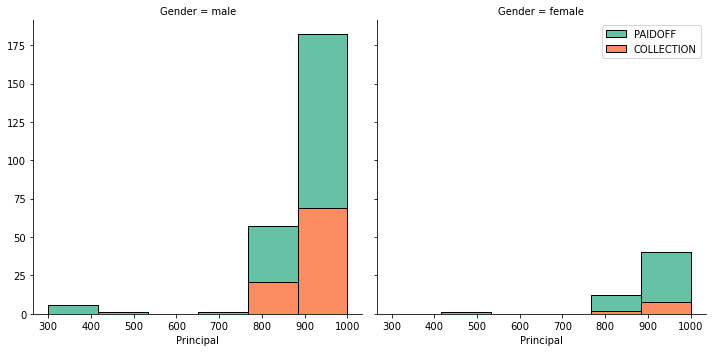

In [47]:
bins = np.linspace(loan_data.Principal.min(), loan_data.Principal.max(), 7) 
g = sns.FacetGrid(data = loan_data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2, height=5)

# bin define the shape of histogram (7 samples)
# hue parameter determines which column in the data frame should be used for colour encoding

g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

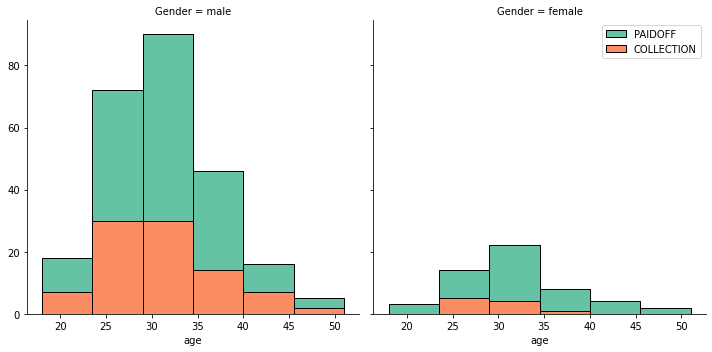

In [48]:
bins=np.linspace(loan_data.age.min(), loan_data.age.max(), 7)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2, height=5)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Feature selection/extraction
**Feature selection** is the process of selecting a subset of relevant attributes of the data for use in machine learning model construction. In this case, visualization can help a bunch. We take a preview of the days of the week when loans are given:

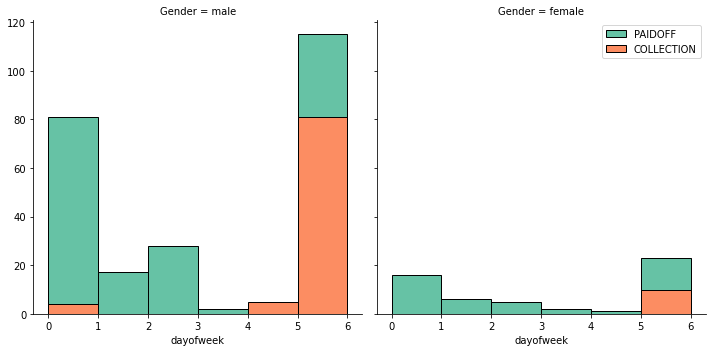

In [49]:
loan_data['dayofweek'] = loan_data['effective_date'].dt.dayofweek
bins=np.linspace(loan_data.dayofweek.min(), loan_data.dayofweek.max(), 7)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2, height=5)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We notice that customers who get the loan at the end of the week have the tendency NOT to pay it off. Therefore, a good idea here is to use `Feature binarization` and this means we can categorize the '**loan status'** as '1' for the `COLLECTION` category and '0' for `PAIDOFF` category.

In [50]:
loan_data['weekend']= loan_data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_data.head()

,Loan_ID,Gender,Principal,terms,effective_date,due_date,paid_off_time,age,education,loan_status,dayofweek,weekend
0,xqd20166231,male,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,45,High School or Below,PAIDOFF,3,0
1,xqd20168902,female,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,50,Bachelor,PAIDOFF,3,0
2,xqd20160003,female,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,33,Bachelor,PAIDOFF,3,0
3,xqd20160004,male,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,27,college,PAIDOFF,3,0
4,xqd20160005,female,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,28,college,PAIDOFF,4,1


#### Converting `categorical` features to `numerical` values

More Data analysis: let's group the loan status feature  in terms of gender and education, first by gender and then by education.
##### **By `Gender`**:

In [51]:
loan_data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

To mention a few findings with the grouping, 84 % of female customers pay off their loans while only 73 % of males pay them off. **Challenge**: 27% male versus 16% female debt `COLLECTION` situation! We can convert **male** to 0 and **female** to 1 to obtain a binary category.

In [52]:
loan_data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loan_data.head()

,Loan_ID,Gender,Principal,terms,effective_date,due_date,paid_off_time,age,education,loan_status,dayofweek,weekend
0,xqd20166231,0,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,45,High School or Below,PAIDOFF,3,0
1,xqd20168902,1,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,50,Bachelor,PAIDOFF,3,0
2,xqd20160003,1,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,33,Bachelor,PAIDOFF,3,0
3,xqd20160004,0,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,27,college,PAIDOFF,3,0
4,xqd20160005,1,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,28,college,PAIDOFF,4,1


##### **By `Education`**:

In [53]:
loan_data.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

### One Hot Encoding
Machine learning (ML) _has another name: 'zeroes and ones'. Indeed_. ML is all about computing and thinks in `0` and `1`?. <b>Not really!</b>
But we can easily achieve this with the concept of 'one hot encoding'. We use the technique to convert categorical variables to binary variables and append them to the feature Data Frame. This is a process by which `categorical variables` are converted into a form that could be provided to ML algorithms to do a better job in prediction. We select our **`features`** of interest before applying **One Hot Encoding** 

In [54]:
loan_data[['Principal','terms','age','Gender', 'weekend','education']].head(10) #select just desired features

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,50,1,0,Bachelor
2,1000,30,33,1,0,Bachelor
3,1000,15,27,0,0,college
4,1000,30,28,1,1,college
5,300,7,35,0,1,Master or Above
6,1000,30,29,0,1,college
7,1000,30,36,0,1,college
8,1000,30,28,0,1,college
9,800,15,26,0,1,college


The **`Master or Above`** category of persons has a much fewer number and so we can drop that. We can just concatenate the **`education`** feature into its 3 different variables, **`college`**, **`Bachalor`** and **`High School or Below`** variables.

In [55]:
loan_data['education'].value_counts().to_frame()

,education
High School or Below,172
college,172
Bachelor,52
Master or Above,4


In [56]:
Feature = loan_data[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan_data['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


In [57]:
#Feature.to_csv('Feature_loandataML.csv', sep=',', header=True, index=True) # export a csv file for reference

#### Feature / Label
Before heading down the Machine Learning road, let's define our features set as `X` and our labels as `y`. By having a quick look, we can preview 8 features and 8 labels within rows 298 to 306 which contain 4 each loan status `PAIDOFF` or `COLLECTION`.

In [58]:
X = Feature
X[298:306] # display rows 298 to 306 for preview

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
298,1000,30,40,0,0,0,1,0
299,1000,30,28,0,0,0,0,1
300,1000,15,29,0,1,0,0,1
301,1000,30,37,0,1,0,1,0
302,1000,30,33,0,1,0,1,0
303,800,15,27,0,1,0,0,1
304,800,15,24,0,1,1,0,0
305,1000,15,31,1,1,0,1,0


In [59]:
y = loan_data['loan_status'].values
y[298:306] # display loan status rows 298 to 306 for preview

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION'], dtype=object)

####  Data Standardization

Standardization of a dataset is a common requirement in machine learning. Many algorithms work better when features are on a relatively similar scale and close to normal distribution. `MinMaxScaler`, `RobustScaler`, `StandardScaler`, and `Normalizer` are different methods used in **Scikit-Learn**  to pre-process data. The choice method depends on the model  and/or the feature values.

Scikit-Learn `StandardScaler` will give the data zero mean and unit variance. This should technically be done after the `train test split`. The result is a distribution with a unit standard deviation and variance (remember that variance = standard deviation squared)

$$\sigma^2 = 1$$
$$\sigma  = 1$$

In [60]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5] # let's view 5 rows

array([[ 0.50130175,  0.92089421,  2.31334964, -0.43236977, -1.21838912,
        -0.38655567,  1.15133896, -0.86855395],
       [ 0.50130175,  0.92089421,  3.14310202,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175,  0.92089421,  0.32194392,  2.31283513, -1.21838912,
         2.5869495 , -0.86855395, -0.86855395],
       [ 0.50130175, -0.9332552 , -0.67375893, -0.43236977, -1.21838912,
        -0.38655567, -0.86855395,  1.15133896],
       [ 0.50130175,  0.92089421, -0.50780846,  2.31283513,  0.82075585,
        -0.38655567, -0.86855395,  1.15133896]])

###  <a id="classfn"></a> 3. APPLYING 4 CLASSIFICATION METHODS

#### <a id="kkk"></a> (a) K Nearest Neighbor (KNN)
This is a supervised classification algorithm we can use to assign a class to a new data point and KKK enables us to classify cases based on their similarity to other cases (cases that are near each other-- neighbours). Interestingly, one `popular use` case for the KNN algorithm is in the area of Credit risk analysis.

**`K`** is termed the number of nearest neighbours and is generally an odd number if the number of classes is 2 as we have. We use the best value of **`K`** to build the model with the best accuracy. However, we have to take note of the few **assumptions** in using the **`KNN`** model:
The dataset
1. Has little noise
2. Is labelled (**`PAIDOFF`** and **`COLLECTION`** in our case)
3. Contains only relevant features
4. is distinguishable into sub groups

#### Split dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#train with 80% of data,  test with 20% 

Train set: (320, 8) (320,)
Test set: (80, 8) (80,)


#### Build and train the **`KNN`** model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = neighbors.KNeighborsClassifier()
k = 7
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

#### Evaluating **`KNN`** model's predictions against the test dataset

In [63]:
# Does the model work?
Lknn_status = kNN_model.predict(X_test)
Lknn_status[1:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION'], dtype=object)

#### **Score the model** 
The model has learnt a bit. We can use the score on the test data for evaluation

In [64]:
kNN_model.score(X_test, y_test)

0.775

In [65]:
y_expect = y_test
y_pred = kNN_model.predict(X_test)
print(metrics.classification_report(y_expect, y_pred)) #*** Score the model ***

              precision    recall  f1-score   support

  COLLECTION       0.53      0.42      0.47        19
     PAIDOFF       0.83      0.89      0.86        61

    accuracy                           0.78        80
   macro avg       0.68      0.65      0.66        80
weighted avg       0.76      0.78      0.77        80



**`recall`** is a measure of a model's completeness. What is the result (table) showing? One is: of all the points that were labeled `PAIDOFF`
1. 89% of those results returned were truly relevant.
2. Of the entire data set, 80% of the results were truly relevant.
High **`precision`** and low **`recall`** generally means that there are fewer results returned, but many of the labels that are predicted are returned correctly.

In [66]:
# kNN_model.score? Run this for help

#### <a id="trees"></a> (b) Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression (regression trees are used when the target variable is numerical or continuous). The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. **`Note`** that SKlearn decision trees do not handle categorical variables. **`Classification`** (for example, loan repayment) is the most commonly used method with Decision Tree algorithm and it
1. is simple to understand and visualize
2. requires little effort for data preparation
3. can handle both numerical and categorical data
4. non-linear parameters do not affect performance

The **`disadvantages`** of Decision Trees include
1. the tendency of being prone to overfitting (this occurs when the algorithm captures noise in the data)
2. getting high variance (the model can get unstable due to small variation in data)
3. result in low bias (difficult for the model to work with new data)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [68]:
Ldt_status = DT_model.predict(X_test)
Ldt_status[0:10] #view 1st 10 results

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [69]:
DT_model.score(X_test, y_test)

0.725

#### <a id="svm"></a> (c) Support Vector Machine
This is a supervised algorithm that classifies cases by finding a separator. It maps data into a high dimensional feature space. In other words, it finds a separator (drawn as a hyperplane. In 3D, the separator can be a plane). The pros **`SVM`** includes accuracy in high-dimesional spaces and memory efficiency. However, the method is prone to overheating and will likely not be efficient on a very large dataset greater than 1000 rows. **`SVM`** has proven to be useful in the appllications of image recognition, sentiment analysis, gene expression classification, etc.

In [70]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [71]:
lSVM = SVM_model.predict(X_test)

In [72]:
SVM_model.score(X_test, y_test)

0.75

#### <a id="lr"></a> (d) Logistic Regression
Logistic regression is a widely used binary classifier (i.e. the target vector can only take two values). A linear model (e.g $\beta_0 + \beta_1x$ ) is included in a logistic (also called sigmoid) function,
$$f(x)={\frac {1}{1+e^{-z}}}$$
such that
$$ P(y_i = 1|X)={\frac {1}{1+e^{-(\beta_0 + \beta_1x)}}}$$

where $ P(y_i = 1|X)$ is the probability of the $i^{th}$ observation’s target value, $y_i$ being class 1, X is the training data, $\beta_0$ and $\beta_1$ are the parameters to be learned, and $e$ is Euler’s number. In other words, Instead of predicting exactly 0 or 1, logistic regression generates a probability— a value between 0 and 1, exclusive. Logistic regression predicts whether something is true or false instead of predicting something continuous. Despite the probability value, it is used for classification: e.g, whether mouse is obese or not. This obesity can be predicted by multiple features (weight, Age, etc). Logistic Regression can work with continuous data or discrete data.

It has been known to be used productively in 'employee attrition modeling' and 'hazardous event prediction'. Note that Logistic regression has a fewer assumptions than linear regression, and this includes data being free from missing values and that the predicted variable is binary.  In other words, it only accepts two values, or it could be ordinal, a categorical variable with ordered values.

In [73]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [74]:
#lSVM = SVM_model.predict(X_test)
lLR = LR_model.predict(X_test)
lLR[0:10] #view 1st 10 results

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [75]:
LR_model.score(X_test, y_test)

0.7625

###  <a id="evaluation"></a> 4. Model Evaluation using 'test set' data
First we load the **`Test`** set for evaluation

In [76]:
test_df = pd.read_csv('data_ML/loan_test.csv')
test_df.head(3)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female


In [77]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [78]:
## Preprocessing test data
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [79]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [80]:
knn_yhat = kNN_model.predict(test_X)
print("KNN Jaccard index: %.2f" % jaccard_score(test_y, knn_yhat, pos_label = 'PAIDOFF'))
print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

KNN Jaccard index: 0.81
KNN F1-score: 0.82


In [81]:
DT_yhat = DT_model.predict(test_X)
print("DT Jaccard index: %.2f" % jaccard_score(test_y, DT_yhat, pos_label = 'PAIDOFF'))
print("DT F1-score: %.2f" % f1_score(test_y, DT_yhat, average='weighted') )

DT Jaccard index: 0.80
DT F1-score: 0.79


In [82]:
SVM_yhat = SVM_model.predict(test_X)
print("SVM Jaccard index: %.2f" % jaccard_score(test_y, SVM_yhat, pos_label = 'PAIDOFF'))
print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.78
SVM F1-score: 0.76


In [83]:
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
print("LR Jaccard index: %.2f" % jaccard_score(test_y, LR_yhat, pos_label = 'PAIDOFF'))
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))

LR Jaccard index: 0.74
LR F1-score: 0.63
LR LogLoss: 0.50


###  <a id="conclusion"></a> 5. Result and Conclusion
We have below, a simple report of the accuracy of the built models using **`Jaccard score`** and **`F1 score`** evaluation metrics. The **`K Nearest Neighbour`** method holds the highest accuracy rate of 81% and 82% in either of the evaluation models (Jaccard Index and F1-Score).

| Method             |Jaccard  |F1-score  | LogLoss |
| :---             | :----     |---:      |---:     |
| KNN                | 0.81    | 0.82     | NA      |
| Decision Tree      | 0.80    | 0.79     | NA      |
| SVM                | 0.78    | 0.76     | NA      |
| LogisticRegression | 0.74    | 0.63     | 0.50    |

